In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('./Nutrient Composition Dataset.csv')

In [5]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [7]:
# confirm if the data is scaled
df.iloc[:, 1:5].describe()

# Mean, maximum, small values are close to each other, so it's understood that scaling was performed.

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [8]:
data = df.iloc[:, 1:5]

In [9]:
data.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


# Hierarchical - Agglomerative

In [12]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [13]:
wardlink = linkage(data, method='ward')

In [23]:
# dend = dendrogram(wardlink)

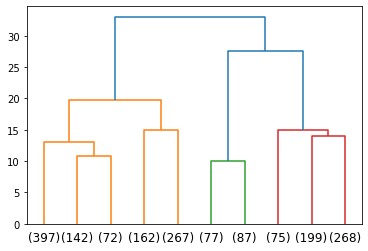

In [16]:
dend = dendrogram(wardlink, truncate_mode='lastp', p = 10)

In [17]:
# Obtain products that belong to each cluster

from scipy.cluster.hierarchy import fcluster

In [19]:
# Create cluster lables with fcluster

# Method 1
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [20]:
# Method 2
clusters = fcluster(wardlink, 23, criterion='distance')
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [21]:
df['clusters'] = clusters
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1


In [22]:
df.to_csv('hc.csv')

# Non-Hierarchical K-Means Clustering

In [25]:
df = pd.read_csv('Cust_Spend_Data_New.csv')

In [27]:
df.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [28]:
df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000
